<center><img src="https://i2.wp.com/hackwagon.com/wp-content/uploads/2017/02/Logo-Web-Export.png?ssl=1" width=200/></center>
<h1> Hackwagon Academy DS102 Lesson 5B </h1>
<h2> Regression </h2> 
<h3> Lesson Outline </h3>


- 1. [Simple Linear Regression](#1)
    - 1.1 [Example - Tips](#1.1)
    - 1.2 [Example - Housing Prices](#1.2)
    - [Practice I](#P1)
- 2. [Multivariate Linear Regression](#2)
    - 2.1 [Example - Housing Prices](#2.1)
    - [Practice II](#P2)

In [ ]:
# install sklearn if not installed already


<hr/>

<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;</font><font color="salmon"> Scikit Learn - SKLearn </font> </h2></a>

<a id='1.1'><h3>5 Standard Steps</h3></a>

**Step 1**: Choose a class of machine learning model from the library 

**Step 2**: Choose the model’s hyperparameters by instantiating with desired values (tuning)

**Step 3**: Arrange data into features and target

**Step 4**: Fit model to your data by using the fit() method of the model 

**Step 5**: Apply the model to new data:
    - For supervised learning, using the predict() method
    - For unsupervised learning, using the predict() or transform() method


<a id='1'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;1.</font><font color="salmon"> Simple Linear Regression </font> </h2></a>

<a id='1.1'><h3>1.1 Example - Tips </h3></a>



In [1]:
import pandas as pd

data = { 
    'ID': [1,2,3,4,5,6],
    'Tips': [10, 25, 12, 8, 15, 20],
    'Meal': [80, 150, 75, 60, 100, 150]
}

tips_df = pd.DataFrame(data)
tips_df

,ID,Tips,Meal
0,1,10,80
1,2,25,150
2,3,12,75
3,4,8,60
4,5,15,100
5,6,20,150


In [8]:
from sklearn import datasets, linear_model

# Step 1 & 2
regr = linear_model.LinearRegression()

# anothe way to do it is 
#from sklearn.linearmodel import LinearRegression
#regr = LinearRegression()

# Step 3
X = tips_df[['Meal']] #must use [[]] as it will accept the list of variables , if not using [[]], need to reshape data
y = tips_df['Tips']


# Step 4
regr.fit(X , y )

LinearRegression()

Step 5 is in another cell because the model has been trained, there is not need to keep re-training the model again and again.

In [12]:
# Step 5 
# Predicting Meal of $10 
regr.predict([[100]])


C:\Users\stell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([14.6029654])

In [19]:
print(regr.coef_)
print(regr.intercept_)
print(regr.score(X,y)) # accuracy, 92% of the changes in tips can be explained by changes in the meals, other 8% may be attributed to other factors
#this is also the R2

#  Tips = -1.27  + 0.158 (Meal)
# With every $1 increase in meal, tips would increase by $0.15

[0.15881384]
-1.2784184514003272
0.9200513242934989


In [20]:
tips_df.corr()

,ID,Tips,Meal
ID,1.000000,0.132599,0.253848
Tips,0.132599,1.000000,0.959193
Meal,0.253848,0.959193,1.000000


<AxesSubplot:xlabel='Meal', ylabel='Tips'>

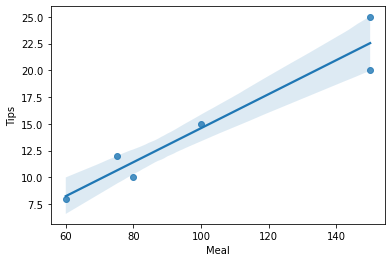

In [18]:
import seaborn as sns

test = tips_df[['Meal', 'Tips']]
sns.regplot(data = test, x = 'Meal', y = 'Tips')

<a id='1.2'><h3>1.2 Example - Housing Prices </h3></a>

Filter to just two columns, where the predictor variable is `sqft_living` and the target variable `price`.  

In [51]:
housing_x = pd.read_csv('housing_x.csv')
price = pd.read_csv('housing_y.csv')
display(housing_x.head())
display(price.head())
X = housing_x[['sqft_living']]
y = price

,sqft_living,sqm_living,floors
0,3500,106.71,2.0
1,1180,35.98,1.0
2,1260,38.41,1.5
3,1520,46.34,1.0
4,1780,54.27,1.0


,price
0,788600
1,600000
2,523000
3,415000
4,535000


### Train Test Split

Filter to just to the `sqft_living` as a DataFrame. Conduct `train_test_split()` to get the four splits of data. 

In [52]:
from sklearn.model_selection import train_test_split
sqft_living = housing_x[['sqft_living']] # << must be a DataFrame (NOT housing['sqft_living'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train

,sqft_living
4884,2510
3163,3020
490,1260
862,1220
1740,1930
...,...
4426,3510
466,1640
3092,2230
3772,1460


**Why split the data?**

![Simple Train and Test](https://i.imgur.com/qOLmXIt.png)

### Fit (or Train) Model

Using the trained datasets, train the model.

In [53]:
simple_lr = linear_model.LinearRegression()
simple_lr.fit(X_train, y_train)



LinearRegression()

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [54]:
print(simple_lr.coef_)
print(simple_lr.intercept_)

# price = -34785.44 + 276.6(Sqft_living)
# For every increase in SQFT_Living, price of the house increases by $276.6 


[[276.61559523]]
[-34785.44388888]


### Predict 

Using `.predict()`, predict with a custom square-feet.

In [55]:
custom_sqft = 10000
simple_lr.predict([[10000]])




C:\Users\stell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[2731370.50837813]])

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [61]:
from sklearn.metrics import r2_score 

model_prediction = simple_lr.predict(X_test)

print(r2_score(y_test, model_prediction))
print(simple_lr.score(X_test, y_test)) #X comes first in the arguments

#both R2 and score are the same in some way.


0.49434750583619946
0.49434750583619946


<a id='P1'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; Take Home Practice </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Performance

### Read  Dataset

Read the `fitness-data.csv` as `fit_df`. 

### Train Test Split

Filter to just to the `RunTime` and `Performance` as a DataFrame each. Conduct `train_test_split()` to get the four splits of data. 

### Fit Model

Create a LinearRegression variable, named  `simple_performance_lr`. Using the trained datasets, train the model.

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

### Predict 

Using `.predict()`, predict with custom values. 

### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.


<a id='2'><h2><img src="https://images.vexels.com/media/users/3/153978/isolated/preview/483ef8b10a46e28d02293a31570c8c56-warning-sign-colored-stroke-icon-by-vexels.png" width=23 align="left"><font color="salmon">&nbsp;2.</font><font color="salmon"> Multivariate Linear Regression </font> </h2></a>

<a id='2.1'><h3>2.1 Example - Housing Prices  </h3></a>

This time, we'll apply more variables to the model and drop variables where necessary.

In [38]:
# Read from CSV the following files: KX_train, KX_test, Ky_train, Ky_test
x_all = pd.read_csv('housing_x.csv')
y_all = pd.read_csv('housing_y.csv')
display(x_all.head())
display(y_all.head())

,sqft_living,sqm_living,floors
0,3500,106.71,2.0
1,1180,35.98,1.0
2,1260,38.41,1.5
3,1520,46.34,1.0
4,1780,54.27,1.0


,price
0,788600
1,600000
2,523000
3,415000
4,535000


### Feature Selection

Detect for multicollinearity and drop variables where necessary by using `.corr()`.

In [39]:
x_all.corr()

,sqft_living,sqm_living,floors
sqft_living,1.000000,1.000000,0.348178
sqm_living,1.000000,1.000000,0.348179
floors,0.348178,0.348179,1.000000


### Train Test Split

Drop and filter to the valid predictors in the model as a DataFrame, `housing_df`. Conduct `train_test_split()` to get the four splits of data. 

In [41]:
from sklearn.model_selection import train_test_split
# Since either SQFT or SQM are highly correlated, drop either one

housing_x = x_all[['sqft_living', 'floors']]

X_train, X_test, y_train, y_test = train_test_split(housing_x, y_all, random_state=42)

In [42]:
print(x_all.shape)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
#by default 75% is train size, it should always between 70-80

(5000, 3)
(3750, 2)
(1250, 2)
(3750, 1)
(1250, 1)


### Fit Model

Create a LinearRegression variable, `multi_housing_lr`. With the train dataframes, use `.fit()` to train the model.

In [46]:

multi_housing_lr = linear_model.LinearRegression()

multi_housing_lr.fit(X_train, y_train)



LinearRegression()

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [47]:
print(multi_housing_lr.coef_)
print(multi_housing_lr.intercept_)

# Housing Price = -48237.317 + 274 (SQFT_Living) + 12566.866 (Floors)

[[  274.0203467  12566.86687756]]
[-48237.31783364]


### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [48]:
from sklearn.metrics import r2_score 
fitted_values = multi_housing_lr.predict(X_test)

print(r2_score(y_test, fitted_values))

0.4947420580577476


<a id='P2'><h2> <img src="https://cdn.shopify.com/s/files/1/1200/7374/products/book_aec28e76-52ec-44ab-bc01-41df1279c89f_550x825.png?v=1473897430" width=25 align="left"> <font color="darkorange"> &nbsp; In-Class Practice </font><font color="skyblue"> * </font></h2></a>

### Fitness Dataset

Based on this fitness dataset, predict the `RunTime` based on the following predictors:

1. Age
2. Weight
3. Oxygen_Consumption
4. Run_Pulse
5. Rest_Pulse
6. Maximum_Pulse
7. Performance

### Read 

In [62]:
# read fitness-data.csv and print first 5 records
fitness_df = pd.read_csv("fitness-data.csv")
fitness_df.head()


,Name,Gender,RunTime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
0,Donna,F,8.17,42.0,68.15,59.57,166.0,40.0,172.0,90.0
1,Gracie,F,8.63,38.0,81.87,60.06,170.0,48.0,186.0,94.0
2,Luanne,F,8.65,43.0,85.84,54.30,156.0,45.0,168.0,83.0
3,Mimi,F,8.92,50.0,70.87,54.63,146.0,48.0,155.0,67.0
4,Chris,M,8.95,49.0,81.42,49.16,180.0,44.0,185.0,72.0


### Feature Selection

With the variables above, detect for multicollinearity and drop variables where necessary by using `.corr()`.

In [63]:
fitness_df.corr()

,RunTime,Age,Weight,Oxygen_Consumption,Run_Pulse,Rest_Pulse,Maximum_Pulse,Performance
RunTime,1.000000,0.195228,0.143508,-0.862185,0.313648,0.450383,0.226103,-0.820491
Age,0.195228,1.000000,-0.240505,-0.311618,-0.316065,-0.150873,-0.414903,-0.712570
Weight,0.143508,-0.240505,1.000000,-0.162891,0.181516,0.043974,0.249381,0.089741
Oxygen_Consumption,-0.862185,-0.311618,-0.162891,1.000000,-0.398080,-0.399348,-0.236767,0.778902
Run_Pulse,0.313648,-0.316065,0.181516,-0.398080,1.000000,0.352461,0.929754,-0.029435
Rest_Pulse,0.450383,-0.150873,0.043974,-0.399348,0.352461,1.000000,0.305124,-0.225600
Maximum_Pulse,0.226103,-0.414903,0.249381,-0.236767,0.929754,0.305124,1.000000,0.090016
Performance,-0.820491,-0.712570,0.089741,0.778902,-0.029435,-0.225600,0.090016,1.000000


### Train Test Split

Based on the correlation matrix, fliter for the __valid__ predictor variables and do `train_test_split` with the target variable `RunTime`. 

In [64]:
X = fitness_df[['Oxygen_Consumption', 'Performance']]
y = fitness_df[['RunTime']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


### Fit Model

Using the train dataframes, create a LinearRegression variable called `multi_runtime_lr`. Use `.fit()`, train the model.

In [65]:
multi_runtime_lr = linear_model.LinearRegression()
multi_runtime_lr.fit(X_train, y_train)




LinearRegression()

### Interpret

With the fitted model, interpret and create the linear equation of the model. 

In [73]:
print(multi_runtime_lr.coef_)
print(multi_runtime_lr.intercept_)
print(multi_runtime_lr.score(X_train, y_train))

[[-0.12009187 -0.03559525]]
[18.30778604]
0.803807136104089


### Assess Performance of Model

Using `r2_score` calculate the R-squared score of the model.

In [74]:
predicted_value = multi_runtime_lr.predict(X_test)
print(r2_score(y_test, predicted_value))


0.6697899064850714
